## 한글 워드클라우드 - 추석 선물

In [15]:
import re, nltk
from konlpy.tag import Okt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 한글 텍스트 전처리

In [4]:
with open('data/추석선물.txt') as file:
    text = file.read()

In [5]:
okt = Okt()
tokens = okt.nouns(text)            # 문장에서 명사 추출
tokens[:10]

['부모님', '추석', '선물', '것', '선물', '라면', '부모님', '선호', '제품', '선물']

In [6]:
# 영문자, 숫자 제거
new_tokens = []
for token in tokens:
    item = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', token)     # 한글이 아닌것은 제거! (문장에서 명사추출안했을때는 blank하나 넣어줌(정규표현식 끝에))
    if item:                # 빈 문자열이면 False, 즉, 빈 문자열이 아닌 것만 추가
        new_tokens.append(item)

In [7]:
print(new_tokens)

['부모님', '추석', '선물', '것', '선물', '라면', '부모님', '선호', '제품', '선물', '저', '어르신', '선호', '명절', '선물', '테크', '안마', '의자', '추천', '안마', '의자', '중', '테크', '다른', '브랜드', '음파', '진동', '기능', '근육', '쏵', '주변', '친척', '테크', '기능', '칭찬', '기능', '기능', '가격', '테크', '현재', '추석', '프로모션', '직영', '점', '방문', '시', '최대', '할인', '안마', '의자', '워낙', '고가', '구매', '때', '고민', '제품', '이번', '프로모션', '기간', '할인', '가격', '실속', '효도', '것', '할인', '직영', '점', '방문', '선착순', '사은', '품', '증정', '이벤트', '진행', '중이', '직접', '매장', '방문', '구매', '추천', '안마', '의자', '직접', '경험', '구매', '관련', '이벤트', '링크', '확인', '것', '도움', '부모님', '추석', '선물', '전달', '명절', '부모님', '추석', '선물', '준비', '건', '생각', '요즘', '부모님', '추석', '선물', '트렌드', '중', '옵션', '추석', '선물', '몇', '가지', '추천', '건강', '식품', '건강', '위', '선물', '인기', '양제', '건강', '보조', '식품', '스낵', '등', '선택', '수', '홈', '카페', '용품', '요즘', '집', '커피', '분', '커피', '머신', '커피', '그라인더', '커피잔', '등', '고려', '가전제품', '부모님', '선물', '가전제품', '수', '로봇청소기', '에어', '프라이어', '전기밥솥', '등', '고려', '헬스', '피트니스', '용품', '운동', '부모님', '헬스', '피트니스', '용품', '수', '요가', '매트', '헬스'

- 불용어 정리
    - 아래 두 과정을 만족할 때까지 반복

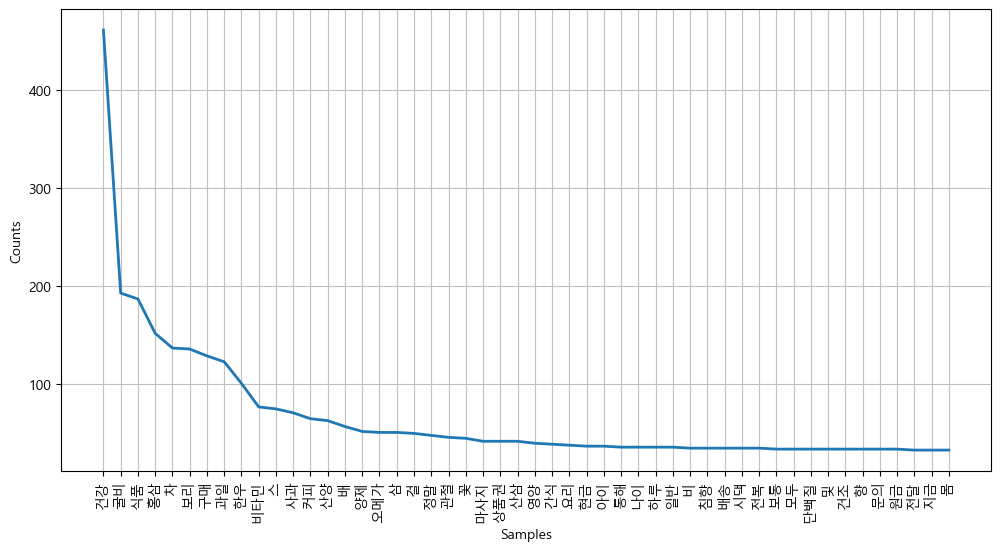

In [11]:
gift = nltk.Text(new_tokens, name='추석 선물')
plt.figure(figsize=(12,6))
gift.plot(50);           # 앞에서부터 50개만 그림

In [9]:
stoptext = """
    선물 추석 세트 수 것 추천 부모님 제품 등 선택 이 저 명절 가격 고민 도움 분 요 제 더 거 링크 
    아래 고려 때 참고 마음 제공 면역 생각 수수료 포장 기능 요즘 종류 고급 가지 선생님 답변 할인 맛
    활동 사람 곳 음식 쿠팡 상품 가족 준비 이번 하나 그 용 부담 질문 파트너 예 위 가장 여기 사용 전
    저희 성분 회복 포함 때문 일환 자주 제일 관리 좀 경우 정액 어르신 확인 포스팅 해 중 브랜드 판매
    보시 아이디어 센스 취향 크기 인기 당뇨 이상 겉 효과 주문 직원 혈액 운동 이벤트 용품 순환 임금님
    사이트 시간 일 위해 피로 기 직접 드릴 어른 다른 채택 품질 바로 정리 회사 집 라면 개선 최고 지급
    자 백화점 한번 가성 실용 구성 더욱 예약
"""
stop_words = stoptext.split()
new_tokens = [token for token in new_tokens if token not in stop_words]
new_tokens[:10]

['선호', '선호', '테크', '안마', '의자', '안마', '의자', '테크', '음파', '진동']

- 워드 클라우드 그리기

- 영어 : 문장 => string 형태
- 한글 : []   => list 형태

In [13]:
gift.vocab().most_common(5)             # 리스트안에 튜플 형태

[('건강', 461), ('굴비', 193), ('식품', 187), ('홍삼', 152), ('차', 137)]

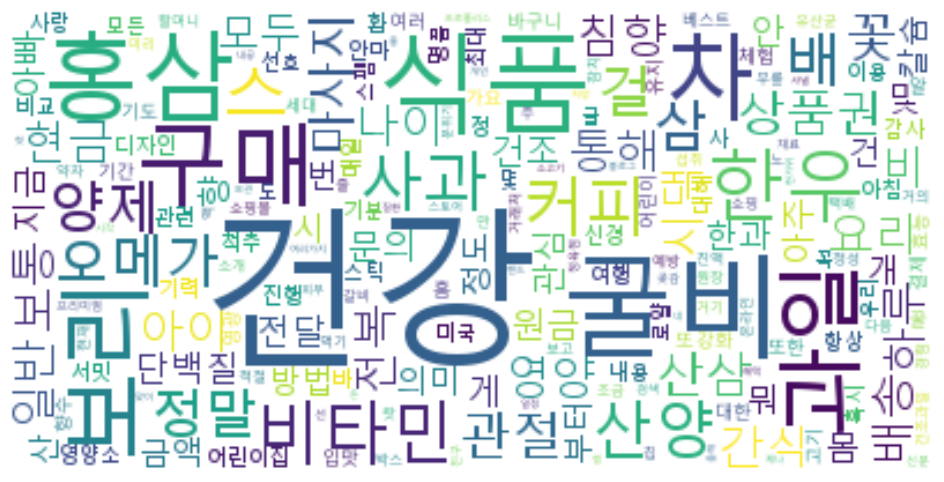

In [25]:
wc = WordCloud(
        background_color='white', random_state=2023,
        #font_path ='C:/Users/human/AppData/Local/Microsoft/Windows/Fonts/NanumMyeongjo.ttf'
        font_path = 'C:/Windows/Font/malgun.ttf',
        relative_scaling=0.6
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- 그림 위에 표시

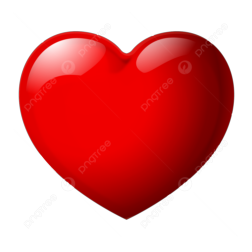

In [29]:
mask = np.array(Image.open('data/heart.png'))

from wordcloud import ImageColorGenerator
Image_colors = ImageColorGenerator(mask)

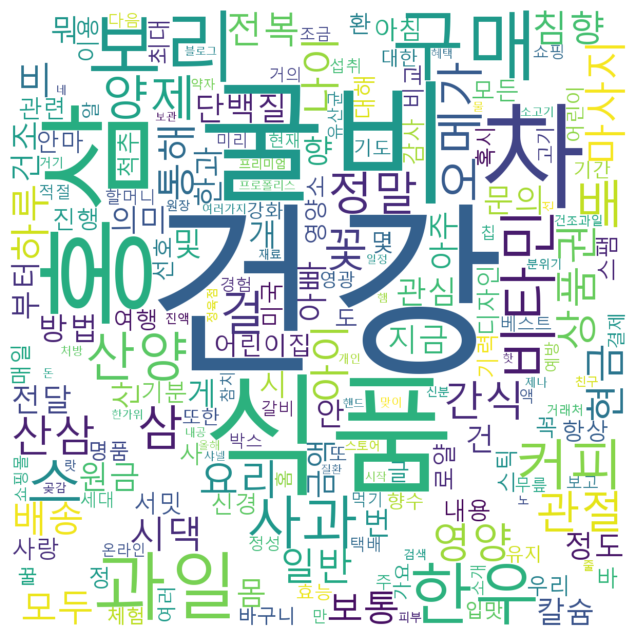

In [31]:
wc = WordCloud(
        background_color='white', random_state=2023,
        mask = mask,
        font_path='C:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');